In [77]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv("Mall_Customers.csv")

In [5]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [81]:
X = dataset.iloc[:,[2, 3]].values

In [8]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [94]:
#Elbow Method
from sklearn.cluster import KMeans

In [95]:
wcss = []

In [98]:
for i in range(2, 51):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

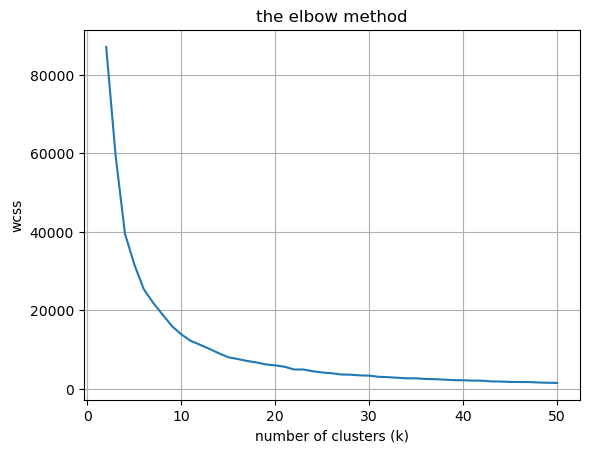

In [97]:
plt.plot(range(2,51), wcss)
plt.title("the elbow method")
plt.xlabel("number of clusters (k)")
plt.ylabel("wcss")
plt.grid(True)
plt.show()

In [100]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)

In [102]:
y_means = kmeans.fit_predict(X)

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [103]:
y_means

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

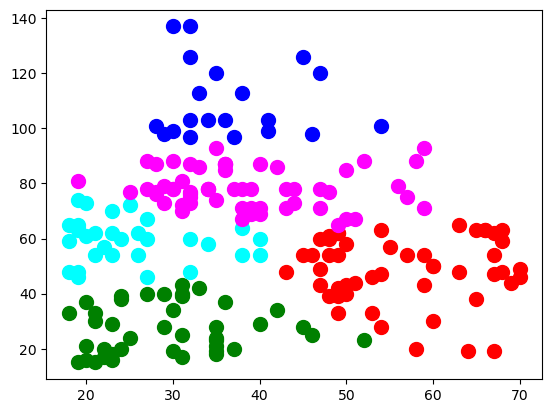

In [106]:
#Visualizing
plt.scatter(X[y_means ==0, 0], X[y_means == 0, 1], s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_means ==1, 0], X[y_means == 1, 1], s=100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_means ==2, 0], X[y_means == 2, 1], s=100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_means ==3, 0], X[y_means == 3, 1], s=100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_means ==4, 0], X[y_means == 4, 1], s=100, c = 'magenta', label = 'Cluster 5')